In [28]:
# import statements

from google.colab import files
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score





In [29]:
# uploading the training data
uploaded_train = files.upload()

Saving train_data.csv to train_data (1).csv


In [30]:
# reading data from dataset-1

df1 = pd.read_csv(io.BytesIO(uploaded_train['train_data.csv']))

dataset_2 = df1.to_numpy()
# dataset_2 = dataset_2.transpose()
print(dataset_2.shape)
# print(dataset_1[-1])

(2300, 2)


2) a) i) Visualizing the data in dataset-2

Text(0.5, 1.0, 'Scatter plot of dataset-2')

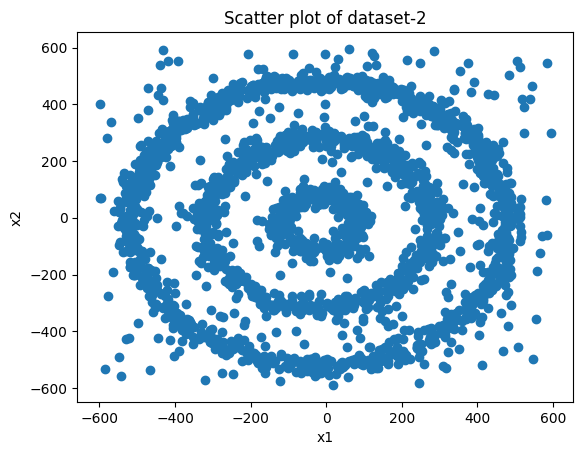

In [31]:
plt.scatter(dataset_2[:,0],dataset_2[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of dataset-2")

ii) Finding the suitable range of values for epsilon by plotting the 'elbow curve' of K-distance vs epsilon.

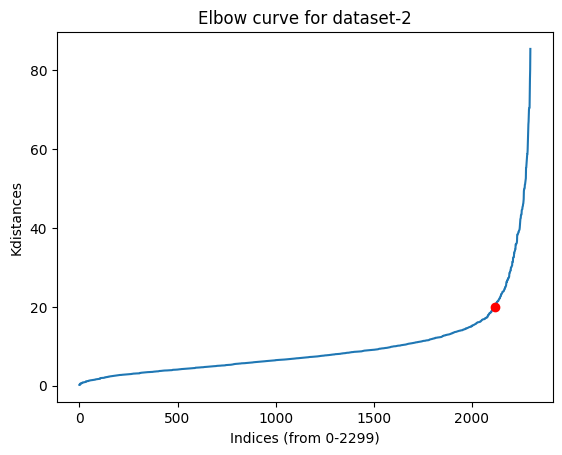

In [32]:


data=dataset_2
neigh = NearestNeighbors(n_neighbors=2)
distances=neigh.fit(data)
kdistances,indices= distances.kneighbors(data)
kdistances= np.sort(kdistances, axis=0)
kdistances=kdistances[:,1]

# plotting the elbow curve
plt.plot(kdistances)
plt.title("Elbow curve for dataset-2")
plt.ylabel("Kdistances")
plt.xlabel("Indices (from 0-2299)")
plt.plot( np.where(kdistances==20.012296162046834)[0],20,'ro')


From the above plot we get ranges for epsilon as (20,30)
b)Implementing DBSCAN for the range of epsilon values.

 The number of clusters=  33


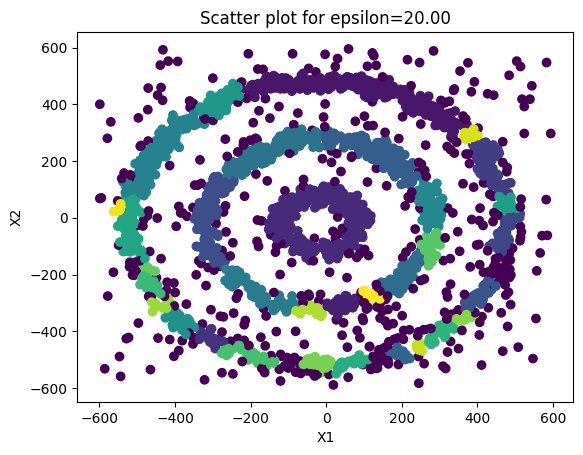

 The number of clusters=  30


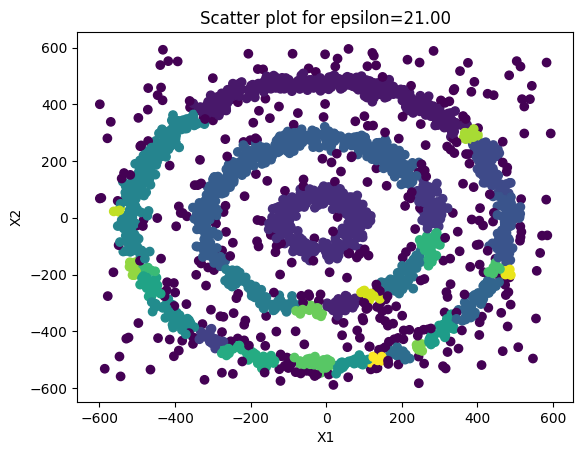

 The number of clusters=  23


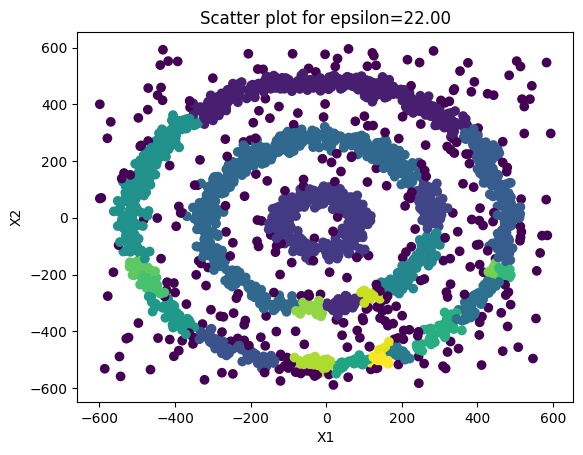

 The number of clusters=  14


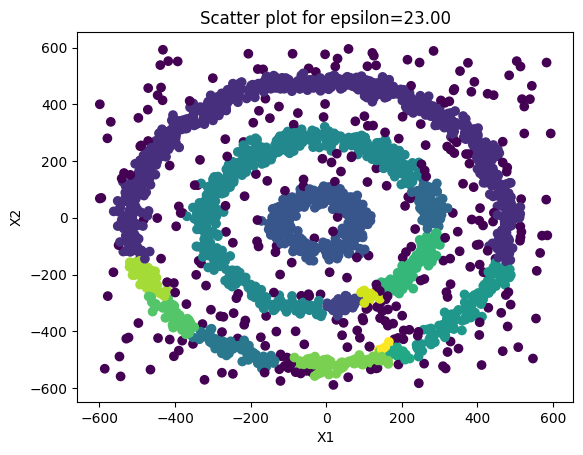

 The number of clusters=  9


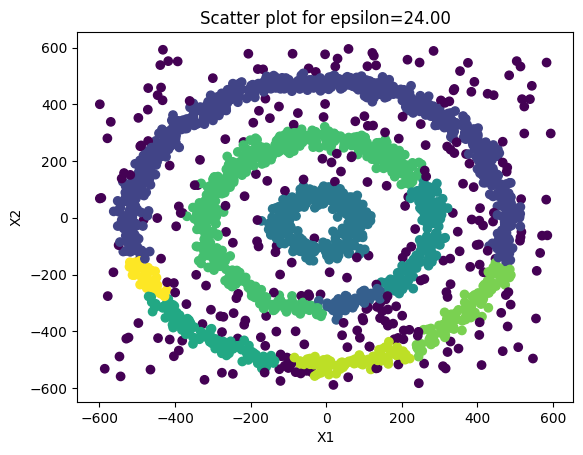

 The number of clusters=  7


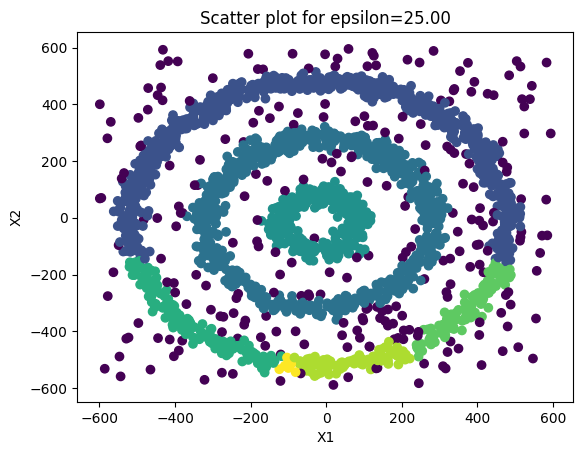

 The number of clusters=  5


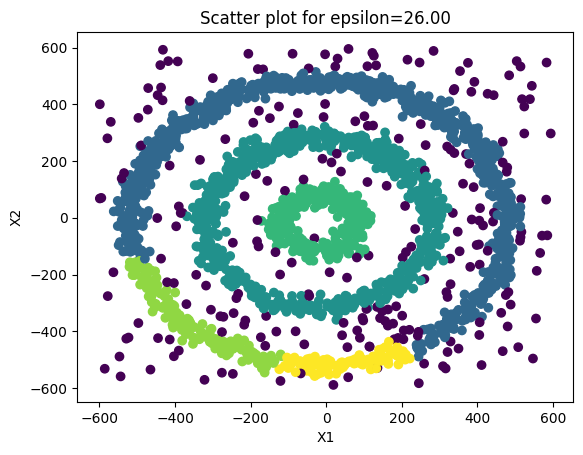

 The number of clusters=  4


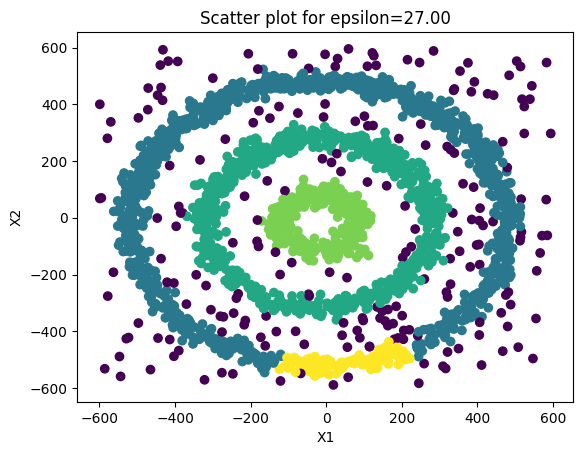

 The number of clusters=  3


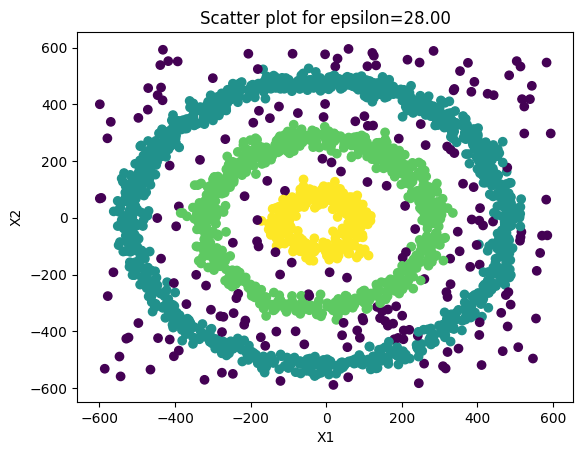

 The number of clusters=  3


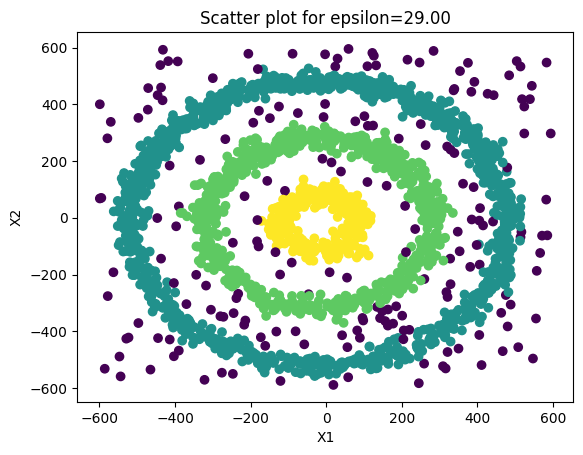

The best plot among these is that for epsilon= 28 and minimum number of points= 5


silhouette_score -0.09637463486726484
 The number of clusters=  3


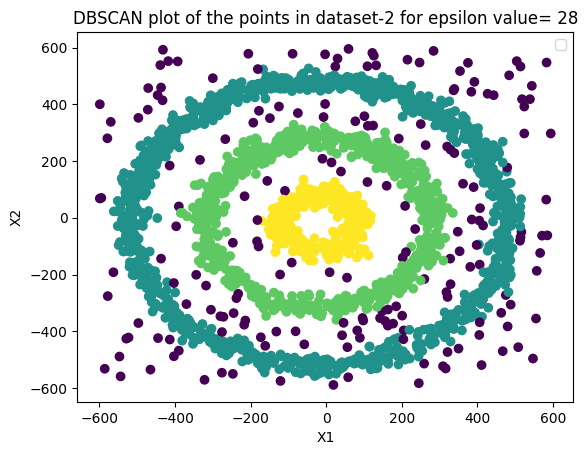

In [33]:
X=dataset_2
def dbscan(data, eps, min_pts):
    labels = [0]*len(X)
    C = 0
    
    for i in range(len(X)):
        if labels[i] == 0:
          
        
          neighbors = find_neighbors(data, i, eps)
          if len(neighbors)>=min_pts:
            C+=1;
            form_cluster(data,i,labels,neighbors,C,eps,min_pts)
          else:
            if len(neighbors)==0:
              labels[i]=-2
            else:
              labels[i]=-1
    return labels

def find_neighbors(X, i, eps):
    neighbors = []
    j=0
    while j<len(X):
      e_dist=((X[i][0]-X[j][0])**2 + (X[i][1]-X[j][1])**2)**0.5
      if e_dist <= eps:
            neighbors.append(j)
      j+=1
    return neighbors

def form_cluster(Y, i, labels, neighbors, C, eps, min_pts):
   
    j = 0    
    while j < len(neighbors):
        p = neighbors[j]
        if labels[p] == -1:
            labels[p] = C
        elif labels[p] == 0:
            labels[p] = C
            new_neighbors = find_neighbors(Y, p, eps)
            if len(new_neighbors) >= min_pts:
                neighbors += new_neighbors
                labels[p] = C
        j += 1

for e in range(20,30):
  labels = dbscan(data, eps=e, min_pts=6)
  plt.scatter(X[:, 0], X[:, 1], c=labels)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.title("Scatter plot for epsilon={:.2f}".format(e))
  print(" The number of clusters= ", max(labels))
  plt.show()
  
  
print("The best plot among these is that for epsilon= 28 and minimum number of points= 5")
labels = dbscan(data, eps=28, min_pts=5)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("DBSCAN plot of the points in dataset-2 for epsilon value= 28")
print("silhouette_score",silhouette_score(X,labels))
print(" The number of clusters= ", max(labels))



The best plot is for the above datapoints is for epsilon=28 with number of minimum points= 5.

C) Implementing K-Means for the above dataset with number of clusters=3 as in the case above.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 1 0 ... 1 0 0]


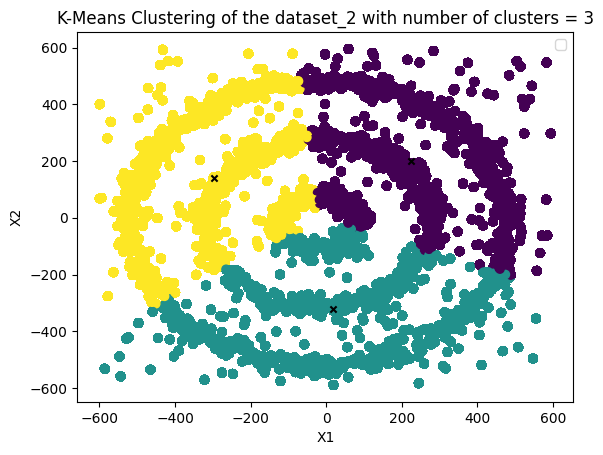

In [34]:
data = dataset_2
kmeans = KMeans(n_clusters=3).fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(labels)
for i in range(len(data)):
    plt.scatter(data[:, 0], data[:, 1], c=labels)

# plot the cluster centers as black X's
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="black",s=20, linewidths=1.5, zorder=10)

# set plot title and axis labels
plt.title("K-Means Clustering of the dataset_2 with number of clusters = 3")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()


In [35]:
# uploading the training data
uploaded_train = files.upload()

Saving train_data_2.csv to train_data_2 (1).csv


In [36]:
# reading data from dataset-1

df1 = pd.read_csv(io.BytesIO(uploaded_train['train_data_2.csv']))

dataset_3 = df1.to_numpy()
print(dataset_3.shape)


(100, 2)


Plotting the scatterplot of the data points of dataset-3.

Text(0.5, 1.0, 'Scatter plot of dataset-3')

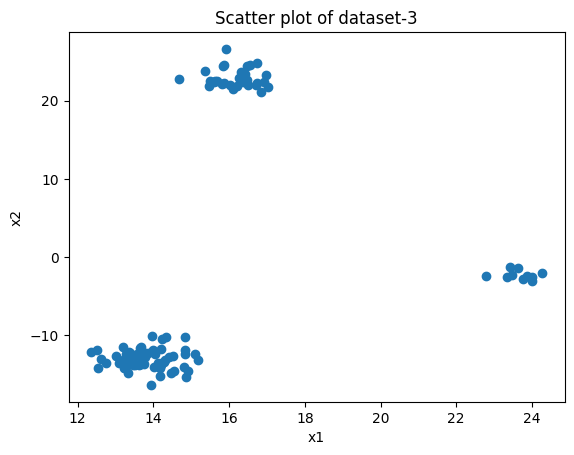

In [37]:
plt.scatter(dataset_3[:,0],dataset_3[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter plot of dataset-3")

Plotting the elbow curve for the above data

Text(0, 0.5, 'kdistances')

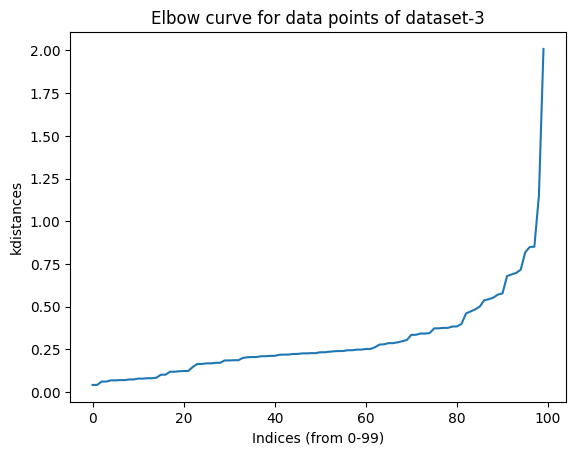

In [38]:
data=dataset_3
neigh = NearestNeighbors(n_neighbors=2)
distances=neigh.fit(data)
kdistances,indices= distances.kneighbors(data)
kdistances= np.sort(kdistances, axis=0)
kdistances=kdistances[:,1]
plt.plot(kdistances)
plt.title("Elbow curve for data points of dataset-3")
plt.xlabel("Indices (from 0-99)")
plt.ylabel("kdistances")

We choose the range of epsilon as (0.5,0.95) and the minimum number of points= 15.

 The number of clusters=  -1


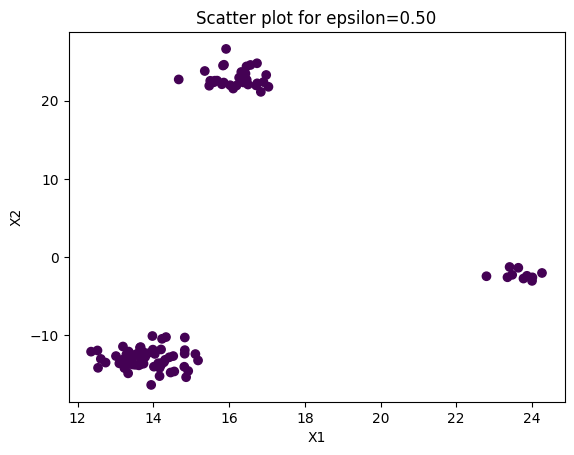

 The number of clusters=  -1


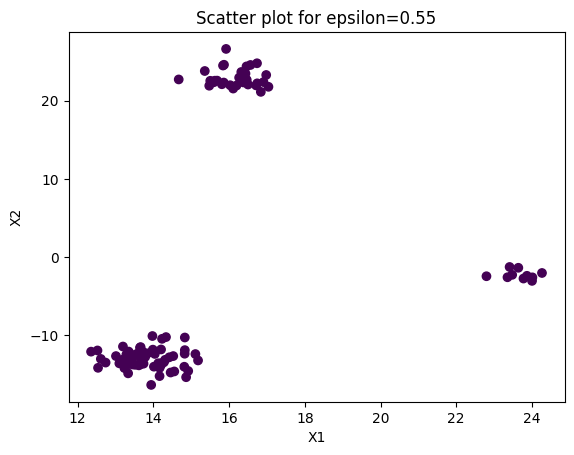

 The number of clusters=  -1


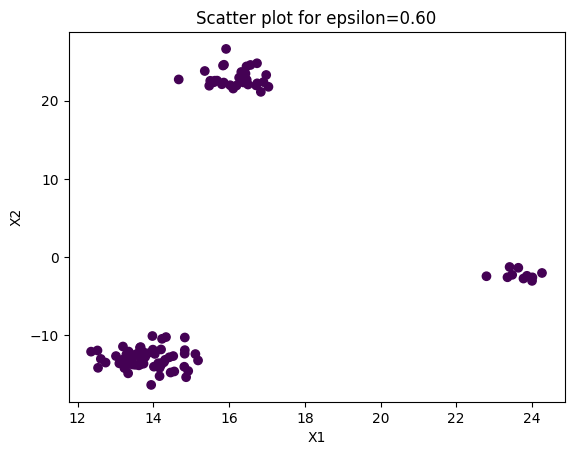

 The number of clusters=  1


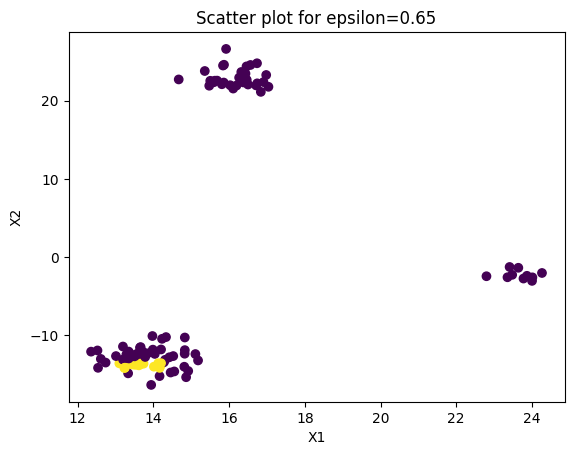

 The number of clusters=  1


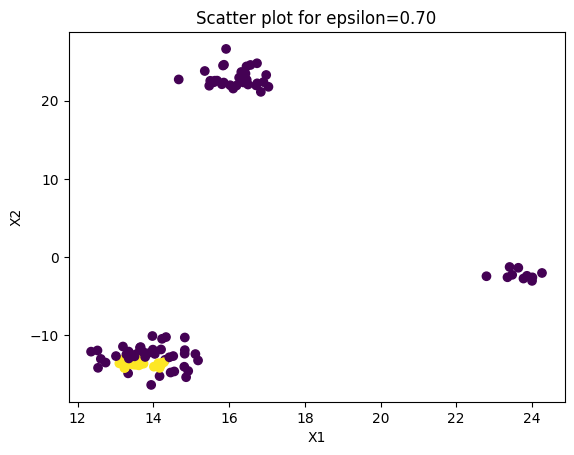

 The number of clusters=  1


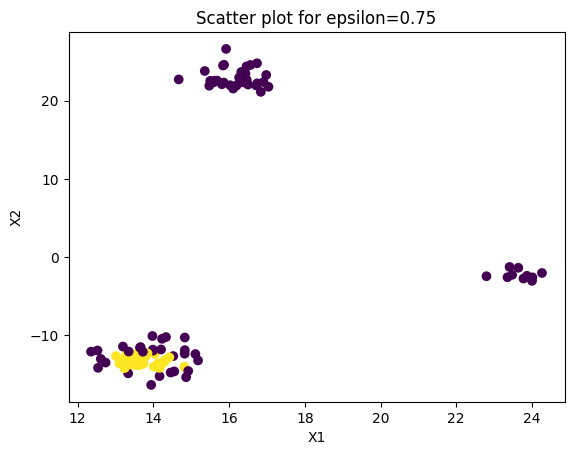

 The number of clusters=  1


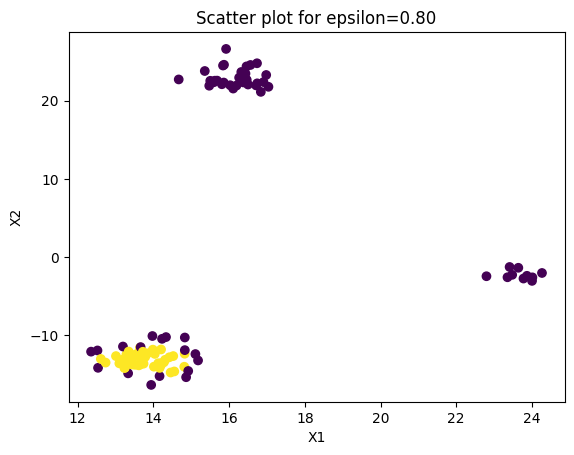

 The number of clusters=  2


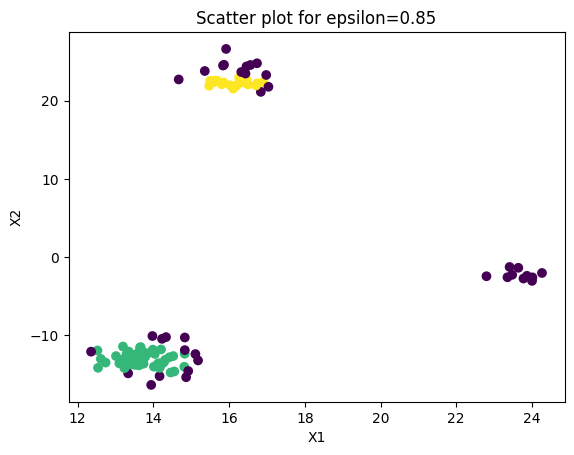

 The number of clusters=  2


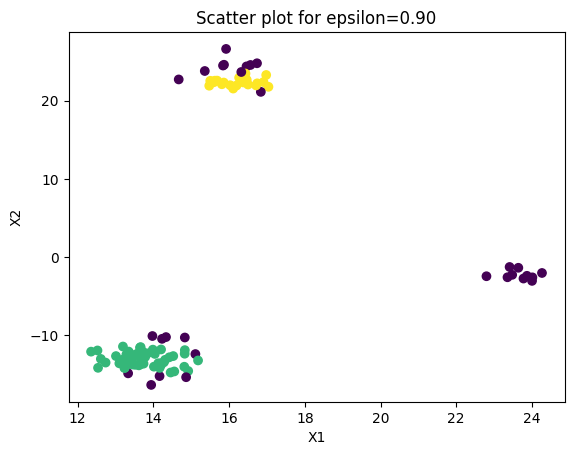

The best plot among these is that for epsilon= 0.85 and minimum number of points= 15


 The number of clusters=  2


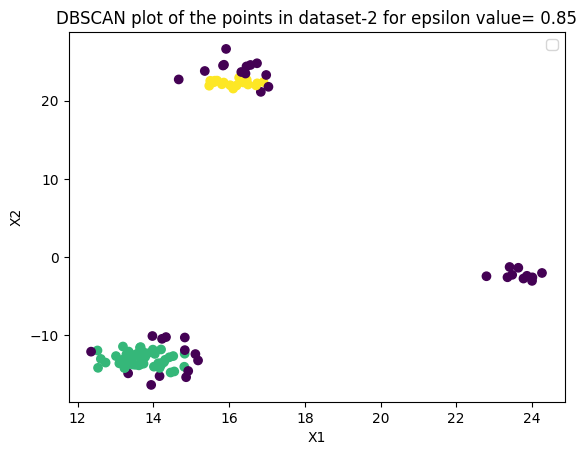

In [48]:
X=dataset_3
def dbscan(data, eps, min_pts):
    labels = [0]*len(X)
    C = 0
    
    for i in range(len(X)):
        if labels[i] == 0:
          
        
          neighbors = find_neighbors(data, i, eps)
          if len(neighbors)>=min_pts:
            C+=1;
            form_cluster(data,i,labels,neighbors,C,eps,min_pts)
          else:
            if len(neighbors)==0:
              labels[i]=-2
            else:
              labels[i]=-1
    return labels

def find_neighbors(X, i, eps):
    neighbors = []
    j=0
    while j<len(X):
      e_dist=((X[i][0]-X[j][0])**2 + (X[i][1]-X[j][1])**2)**0.5
      if e_dist <= eps:
            neighbors.append(j)
      j+=1
    return neighbors

def form_cluster(Y, i, labels, neighbors, C, eps, min_pts):
   
    j = 0    
    while j < len(neighbors):
        p = neighbors[j]
        if labels[p] == -1:
            labels[p] = C
        elif labels[p] == 0:
            labels[p] = C
            new_neighbors = find_neighbors(Y, p, eps)
            if len(new_neighbors) >= min_pts:
                neighbors += new_neighbors
                labels[p] = C
        j += 1

for e in np.arange(0.5, 0.95, 0.05):
  labels = dbscan(data, eps=e, min_pts=15)
  plt.scatter(X[:, 0], X[:, 1], c=labels)
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.title("Scatter plot for epsilon={:.2f}".format(e))
  print(" The number of clusters= ", max(labels))
  plt.show()
  
  
print("The best plot among these is that for epsilon= 0.85 and minimum number of points= 15")
labels = dbscan(data, eps=0.85, min_pts=15)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("DBSCAN plot of the points in dataset-2 for epsilon value= 0.85")

print(" The number of clusters= ", max(labels))



The best plot has 2 clusters and epsilon value of 0.85.

Implementing K-Means for K=3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'X2')

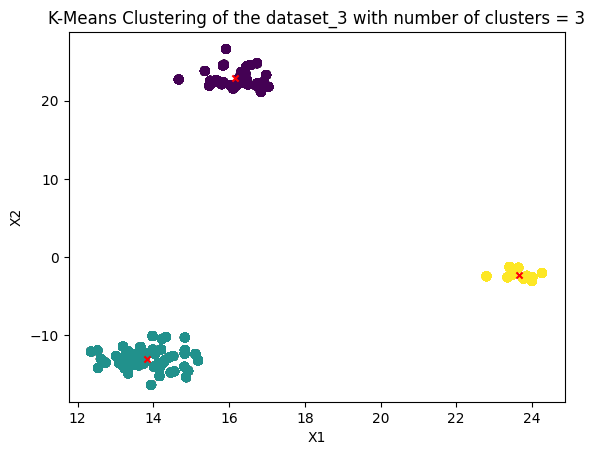

In [41]:
data = dataset_3
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

for i in range(len(data)):
    plt.scatter(data[:, 0], data[:, 1], c=labels)

# plot the cluster centers as black X's
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="r",s=20, linewidths=1.5, zorder=10)

# set plot title and axis labels
plt.title("K-Means Clustering of the dataset_3 with number of clusters = 3")
plt.xlabel("X1")
plt.ylabel("X2")
